<a href="https://colab.research.google.com/github/Revernd/Bussiness-Case-Studies/blob/main/Uber%20Case%20Study/Uber_Drop_rate_case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files

uploaded = files.upload()

Saving uber-data.csv to uber-data.csv


In [3]:
df = pd.read_csv("uber-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [4]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"], dayfirst=True, format='mixed')
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"], dayfirst=True, format='mixed')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [5]:
df.describe()

,Request id,Driver id,Request timestamp,Drop timestamp
count,6745.000000,4095.000000,6745,2831
mean,3384.644922,149.501343,2016-07-13 13:43:04.303039232,2016-07-13 13:15:33.899328768
min,1.000000,1.000000,2016-07-11 00:00:00,2016-07-11 00:51:00
25%,1691.000000,75.000000,2016-07-12 07:51:00,2016-07-12 07:42:00
50%,3387.000000,149.000000,2016-07-13 14:23:37,2016-07-13 12:14:06
75%,5080.000000,224.000000,2016-07-14 19:39:27,2016-07-14 19:13:52
max,6766.000000,300.000000,2016-07-15 23:59:58,2016-07-16 01:09:24
std,1955.099667,86.051994,NaN,NaN


In [6]:
df["RequestHour"] = df["Request timestamp"].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [7]:
times = [0, 4, 9, 16, 21, 24]
values = ["Dawn", "Early Morning", "Noon", "Late Evening", "Night"]

df["TimeSlot"] = pd.cut(x=df["RequestHour"], bins=times, labels=values)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning


In [8]:
df['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [9]:
df["Cab Availability"] = df["Status"].apply(lambda x:
                                            "Available" if x=="Trip Completed"
                                            else "Not Available")

In [10]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,Cab Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Available


In [11]:
df['Cab Availability'].value_counts(normalize=True)*100

Cab Availability
Not Available    58.028169
Available        41.971831
Name: proportion, dtype: float64

<Axes: xlabel='RequestHour'>

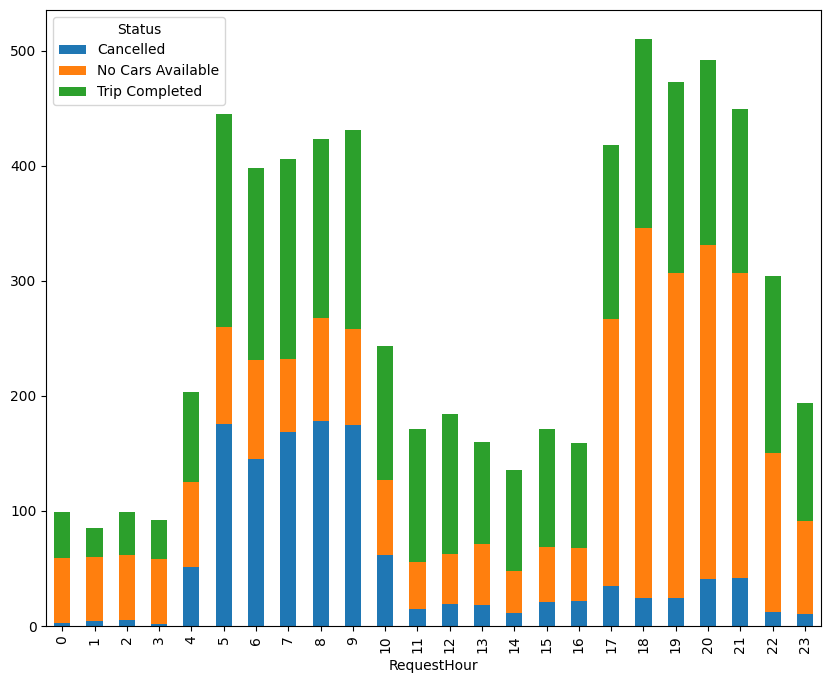

In [12]:
# What is the frequency of requests that get cancelled or show no cars available in the status

df.groupby(["RequestHour", "Status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))

<Axes: >

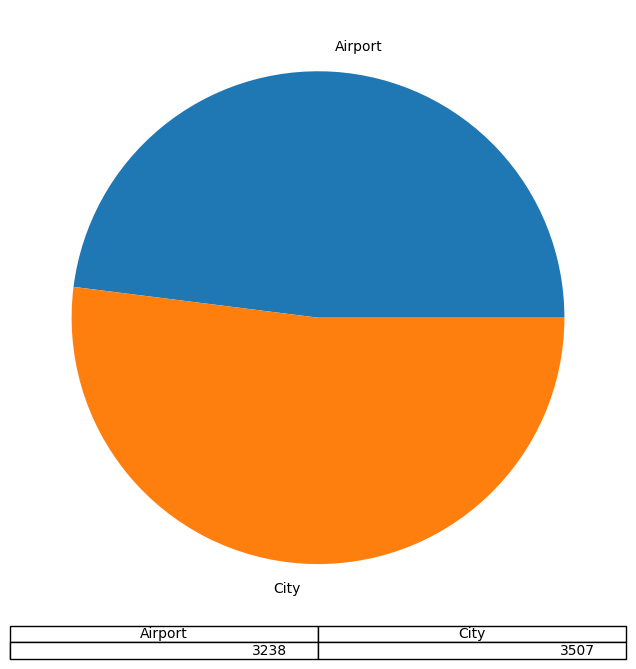

In [13]:
# Types of requests (city->airport or airport->city)

df.groupby(['Pickup point']).size().plot(kind='pie', stacked=True, figsize=(10, 8), table=True)

<Axes: >

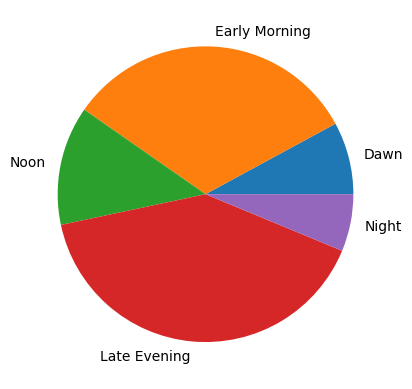

In [14]:
df.loc[df['Cab Availability'] == 'Not Available'].groupby(['TimeSlot']).size().plot(kind='pie', stacked=True)

<Axes: xlabel='RequestHour'>

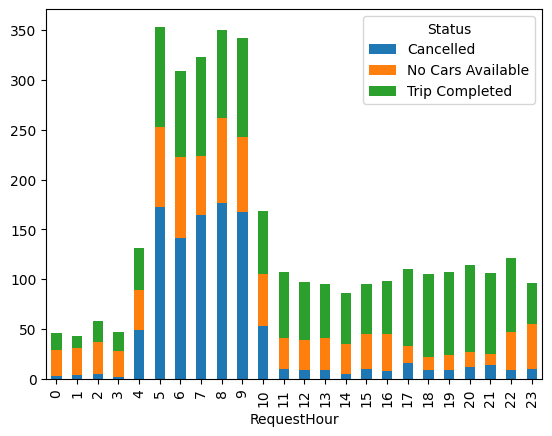

In [15]:
df.loc[df['Pickup point']=='City'].groupby(['RequestHour', 'Status']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='RequestHour'>

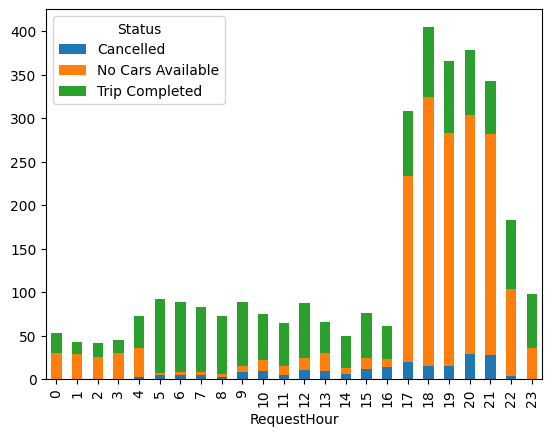

In [17]:
# Demand supply gap from airport to city

df.loc[df['Pickup point']=='Airport'].groupby(['RequestHour', 'Status']).size().unstack().plot(kind='bar', stacked=True)

Observation: There is high demand of cabs from airport to city between 5-9pm


## Observations


1.   Trips from Airport to city are most 'cancelled' during 5-9AM periods.
2.   Trips from city to Airport are plagued by 'No Cars Available' issues between 5-9PM.


## Recommendations
1.  Trips from airport to city could modified to have reduced prices during the 5-9AM period for customer attraction and retention.
2.  Trips from from city airport could be benefitted by investing in extra charge for drivers to pick up more requests and investing in increasing overall owned cars volume.
